In [1]:
import numpy as np

def linear_regression_fit(X, y, alpha=0.01, num_iters=1000):
    """
    使用梯度下降训练线性回归模型(支持多维特征)。
    
    参数：
    --------
    X : np.ndarray
        训练数据的特征矩阵, 形状为 (m, n)，
        其中 m 是样本数量, n 是特征数量。
    y : np.ndarray
        训练数据的目标值, 形状为 (m,)。
    alpha : float, 可选
        学习率, 决定每次梯度更新的步长。
    num_iters : int, 可选
        迭代次数, 决定执行多少次梯度下降。

    返回：
    --------
    w : np.ndarray
        学到的权重向量, 形状为 (n,)。
    b : float
        学到的偏置(截距)。
    cost_history : list
        每次迭代计算得到的损失（MSE）值，用于分析收敛情况。
    """

    # 1. 初始化
    m, n = X.shape  # m个样本, n个特征
    w = np.zeros(n) # 权重向量 w
    b = 0.0         # 偏置 b
    
    cost_history = []  # 用于记录每次迭代的损失

    # 2. 进行梯度下降
    for _ in range(num_iters):
        # 2.1 预测值 y_pred
        y_pred = np.dot(X, w) + b  # (m,) = (m,n) dot (n,) + (标量)

        # 2.2 计算误差
        error = y_pred - y         # (m,)

        # 2.3 计算损失函数 J(w,b)，这里用平均的MSE
        cost = np.mean(error ** 2) / 2  # 等价于 (1/(2m)) sum(...), 因为 np.mean(error**2) = 1/m sum(...)
        cost_history.append(cost)

        # 2.4 计算梯度
        # 对 w 的梯度: (n,) =  (1/m) * X.T dot error
        dw = (1/m) * np.dot(X.T, error)
        # 对 b 的梯度: (标量) = (1/m) * sum(error)
        db = (1/m) * np.sum(error)

        # 2.5 参数更新
        w = w - alpha * dw
        b = b - alpha * db

    # 3. 返回训练好的参数和损失历史
    return w, b, cost_history


def linear_regression_predict(X, w, b):
    """
    线性回归预测函数。
    
    参数：
    --------
    X : np.ndarray
        测试数据或需要预测的数据特征矩阵, 形状为 (m, n)。
    w : np.ndarray
        训练好的权重向量, 形状为 (n,)。
    b : float
        训练好的偏置。

    返回：
    --------
    y_pred : np.ndarray
        预测结果向量, 形状为 (m,)。
    """
    return np.dot(X, w) + b


# 以下为一个简单的测试示例
if __name__ == "__main__":
    # 1. 构造一个简单的多维训练数据
    # 比如我们认为真实关系是: y = 3*X1 + 5*X2 + 10 (带一些噪声)
    
    np.random.seed(0)   # 固定随机种子，为了输出可复现
    
    m = 100  # 样本数量
    X1 = 2 * np.random.rand(m)      # (m,) 特征1
    X2 = 5 * np.random.rand(m)      # (m,) 特征2
    noise = np.random.randn(m)      # (m,) 一些高斯噪声

    # 构造真实标签
    y_true = 3 * X1 + 5 * X2 + 10 + noise
    
    # 将 X1, X2 合并为特征矩阵X, 形状 (m, n=2)
    X_train = np.column_stack((X1, X2))
    
    # 2. 使用我们编写的线性回归进行训练
    w_learned, b_learned, costs = linear_regression_fit(X_train, y_true, alpha=0.1, num_iters=1000)
    
    # 3. 训练完成后，输出学到的参数
    print("Learned weights (w):", w_learned)
    print("Learned bias (b):", b_learned)
    
    # 4. 使用训练好的模型进行预测
    y_pred = linear_regression_predict(X_train, w_learned, b_learned)
    
    # 5. 查看最终的训练损失
    final_cost = costs[-1]
    print("Final training cost (MSE / 2):", final_cost)


Learned weights (w): [2.72425521 4.94825803]
Learned bias (b): 10.307142056952099
Final training cost (MSE / 2): 0.4158081873353314


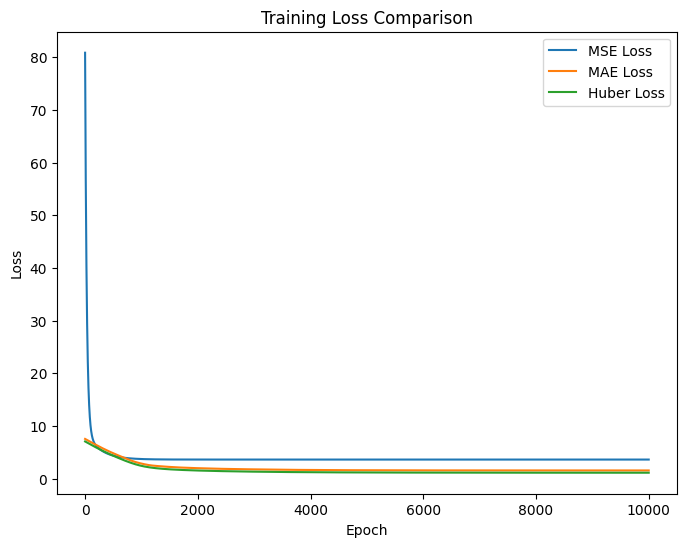

===== Final Learned Parameters =====
MSE    -> w: 2.9188, b: 2.3489, final_loss: 3.6329
MAE    -> w: 2.8997, b: 2.2028, final_loss: 1.5663
Huber  -> w: 2.9048, b: 2.2211, final_loss: 1.1345


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples=100, w_true=3.0, b_true=2.0, noise_std=1.0):
    """
    生成模拟的线性回归数据: y = w_true * x + b_true + 噪声
    """
    X = np.linspace(-5, 5, num_samples)
    np.random.shuffle(X)
    noise = np.random.randn(num_samples) * noise_std
    y = w_true * X + b_true + noise
    return X, y

def linear_model(X, w, b):
    """
    线性模型 y_hat = w * X + b
    """
    return w * X + b

def mse_loss_and_grad(X, y, y_hat):
    """
    均方误差 (MSE) 及其梯度
    
    Loss = (1/N) * sum((y_hat - y)^2)
    dL/dw = (2/N) * sum((y_hat - y) * X)
    dL/db = (2/N) * sum(y_hat - y)
    """
    N = len(y)
    error = y_hat - y
    loss = np.mean(error ** 2)
    
    dw = (2 / N) * np.sum(error * X)
    db = (2 / N) * np.sum(error)
    return loss, dw, db

def mae_loss_and_grad(X, y, y_hat):
    """
    平均绝对误差 (MAE) 及其梯度
    
    Loss = (1/N) * sum(|y_hat - y|)
    dL/dw = (1/N) * sum(sign(y_hat - y) * X)
    dL/db = (1/N) * sum(sign(y_hat - y))
    其中 sign(x) 为符号函数:
       sign(x) = 1  if x > 0
                 0  if x == 0
                -1  if x < 0
    """
    N = len(y)
    error = y_hat - y
    loss = np.mean(np.abs(error))
    
    # 注意对 0 的处理（这里简单写成 np.sign）
    dw = np.mean(np.sign(error) * X)
    db = np.mean(np.sign(error))
    return loss, dw, db

def huber_loss_and_grad(X, y, y_hat, delta=1.0):
    """
    Huber Loss 及其梯度
    
    L_delta(r) = 0.5 * r^2                 if |r| <= delta
               = delta * |r| - 0.5*delta^2 if |r| > delta
    其中 r = y_hat - y
    
    对应的梯度:
    dL/dr = r          if |r| <= delta
          = delta * sign(r)  if |r| > delta
    """
    N = len(y)
    error = y_hat - y
    abs_error = np.abs(error)
    
    # 损失的计算
    is_small_error = abs_error <= delta
    # 对每个样本逐一计算
    loss_array = np.where(is_small_error,
                          0.5 * error**2,
                          delta * abs_error - 0.5 * delta**2)
    loss = np.mean(loss_array)
    
    # 梯度的计算
    grad_error = np.where(is_small_error,
                          error,               # r
                          delta * np.sign(error))
    
    dw = np.sum(grad_error * X) / N
    db = np.sum(grad_error) / N
    return loss, dw, db


def train_linear_regression(X, y, loss_type='mse', 
                            epochs=100, lr=0.01, delta=1.0):
    """
    使用指定的损失函数训练线性回归，返回训练过程中每个epoch的loss列表，以及学到的 w, b
    
    参数:
    -------
    X, y: 训练数据
    loss_type: 损失函数类型，可选 'mse', 'mae', 'huber'
    epochs: 迭代次数
    lr: 学习率
    delta: Huber Loss中的阈值
    
    返回:
    -------
    losses: 每次迭代的损失值
    w, b: 训练完成后学到的参数
    """
    # 初始化参数 w, b
    w = 0.0
    b = 0.0
    
    losses = []
    for epoch in range(epochs):
        # 前向传播
        y_hat = linear_model(X, w, b)
        
        # 根据loss_type选择相应的损失函数及梯度
        if loss_type == 'mse':
            loss, dw, db = mse_loss_and_grad(X, y, y_hat)
        elif loss_type == 'mae':
            loss, dw, db = mae_loss_and_grad(X, y, y_hat)
        elif loss_type == 'huber':
            loss, dw, db = huber_loss_and_grad(X, y, y_hat, delta)
        else:
            raise ValueError("Unsupported loss function type.")
        
        # 记录loss
        losses.append(loss)
        
        # 梯度更新
        w -= lr * dw
        b -= lr * db
    
    return losses, w, b


if __name__ == "__main__":
    # 1. 准备数据
    np.random.seed(42)
    X, y = generate_data(num_samples=200, w_true=3.0, b_true=2.0, noise_std=2.0)
    
    # 2. 分别训练使用 MSE, MAE, Huber 的线性回归模型
    epochs = 10000
    lr = 0.001
    
    losses_mse, w_mse, b_mse = train_linear_regression(X, y, 
                                                       loss_type='mse', 
                                                       epochs=epochs, 
                                                       lr=lr)
    
    losses_mae, w_mae, b_mae = train_linear_regression(X, y, 
                                                       loss_type='mae', 
                                                       epochs=epochs, 
                                                       lr=lr)
    
    # 这里设定一个 delta = 1.0
    losses_huber, w_huber, b_huber = train_linear_regression(X, y, 
                                                             loss_type='huber', 
                                                             epochs=epochs, 
                                                             lr=lr, 
                                                             delta=1.0)
    
    # 3. 画出不同损失函数在训练过程中损失的变化曲线
    plt.figure(figsize=(8, 6))
    plt.plot(losses_mse, label='MSE Loss')
    plt.plot(losses_mae, label='MAE Loss')
    plt.plot(losses_huber, label='Huber Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.show()
    
    # 4. 最终学到的参数对比
    print("===== Final Learned Parameters =====")
    print(f"MSE    -> w: {w_mse:.4f}, b: {b_mse:.4f}, final_loss: {losses_mse[-1]:.4f}")
    print(f"MAE    -> w: {w_mae:.4f}, b: {b_mae:.4f}, final_loss: {losses_mae[-1]:.4f}")
    print(f"Huber  -> w: {w_huber:.4f}, b: {b_huber:.4f}, final_loss: {losses_huber[-1]:.4f}")
